Forex data analysis using machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import google.datalab.bigquery as bq

In [63]:
df = bq.Query(sql='SELECT TIME(FEED_TIME) as FEED_TIME, SOURCE,ASK_PRICE,BID_PRICE FROM caxton.caxton_data ORDER BY FEED_TIME ASC').execute().result().to_dataframe()

In [64]:
df_copy=df.copy()
df.describe()

,ASK_PRICE,BID_PRICE
count,457510.000000,457510.000000
mean,32.038419,32.025051
std,51.411174,51.393828
min,0.684220,0.675450
25%,1.161440,1.160900
50%,1.327860,1.327280
75%,18.807400,18.789830
max,132.638000,131.770000


In [65]:
df.set_index(['FEED_TIME'],inplace=True)

In [66]:
#calculating the spread for the entire data
df['Spread']=df['ASK_PRICE']-df['BID_PRICE']
df['Spread']=df['Spread']
df['Spread'].head()

FEED_TIME
14:59:59.546000    0.0275
14:59:59.546000    0.0275
14:59:59.546000    0.0221
14:59:59.547000    0.0090
14:59:59.595000    0.0350
Name: Spread, dtype: float64

In [67]:
#df_new=df[['FEED_TIME','SOURCE','Spread']]
#df_new.set_index(['FEED_TIME'],inplace=True)

SOURCE
BNPFX     Axes(0.125,0.125;0.775x0.775)
BOFAFX    Axes(0.125,0.125;0.775x0.775)
DBFX      Axes(0.125,0.125;0.775x0.775)
GSFX      Axes(0.125,0.125;0.775x0.775)
JPMCFX    Axes(0.125,0.125;0.775x0.775)
MSFX      Axes(0.125,0.125;0.775x0.775)
UBSFX     Axes(0.125,0.125;0.775x0.775)
Name: Spread, dtype: object

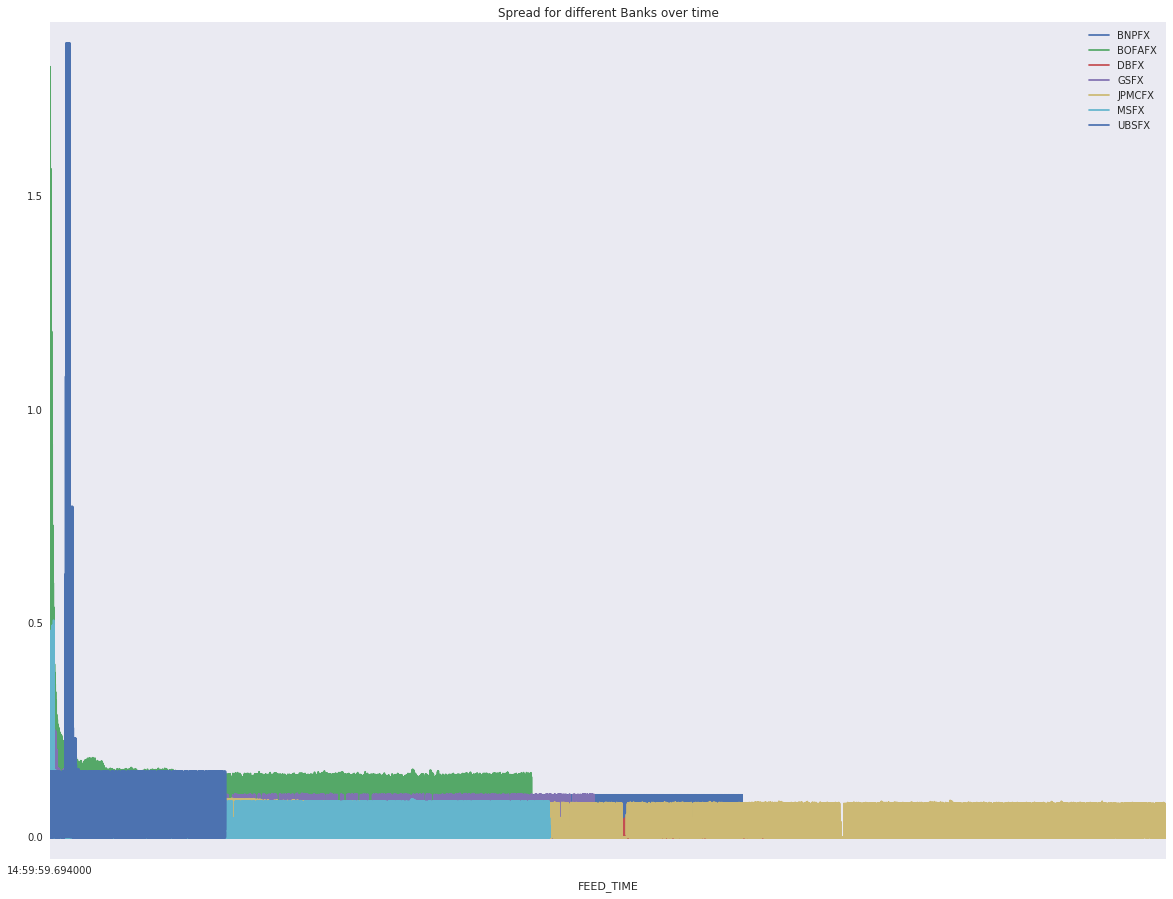

In [81]:
df.groupby('SOURCE')['Spread'].plot(legend=True,figsize=(20,15),ylim=(-0.05,df['Spread'].max()+0.05),grid=False,title='Spread for different Banks over time')

In [73]:
df['100ma'] = df['Spread'].rolling(window=150,min_periods=0).mean()

SOURCE
BNPFX     Axes(0.125,0.125;0.775x0.775)
BOFAFX    Axes(0.125,0.125;0.775x0.775)
DBFX      Axes(0.125,0.125;0.775x0.775)
GSFX      Axes(0.125,0.125;0.775x0.775)
JPMCFX    Axes(0.125,0.125;0.775x0.775)
MSFX      Axes(0.125,0.125;0.775x0.775)
UBSFX     Axes(0.125,0.125;0.775x0.775)
Name: 100ma, dtype: object

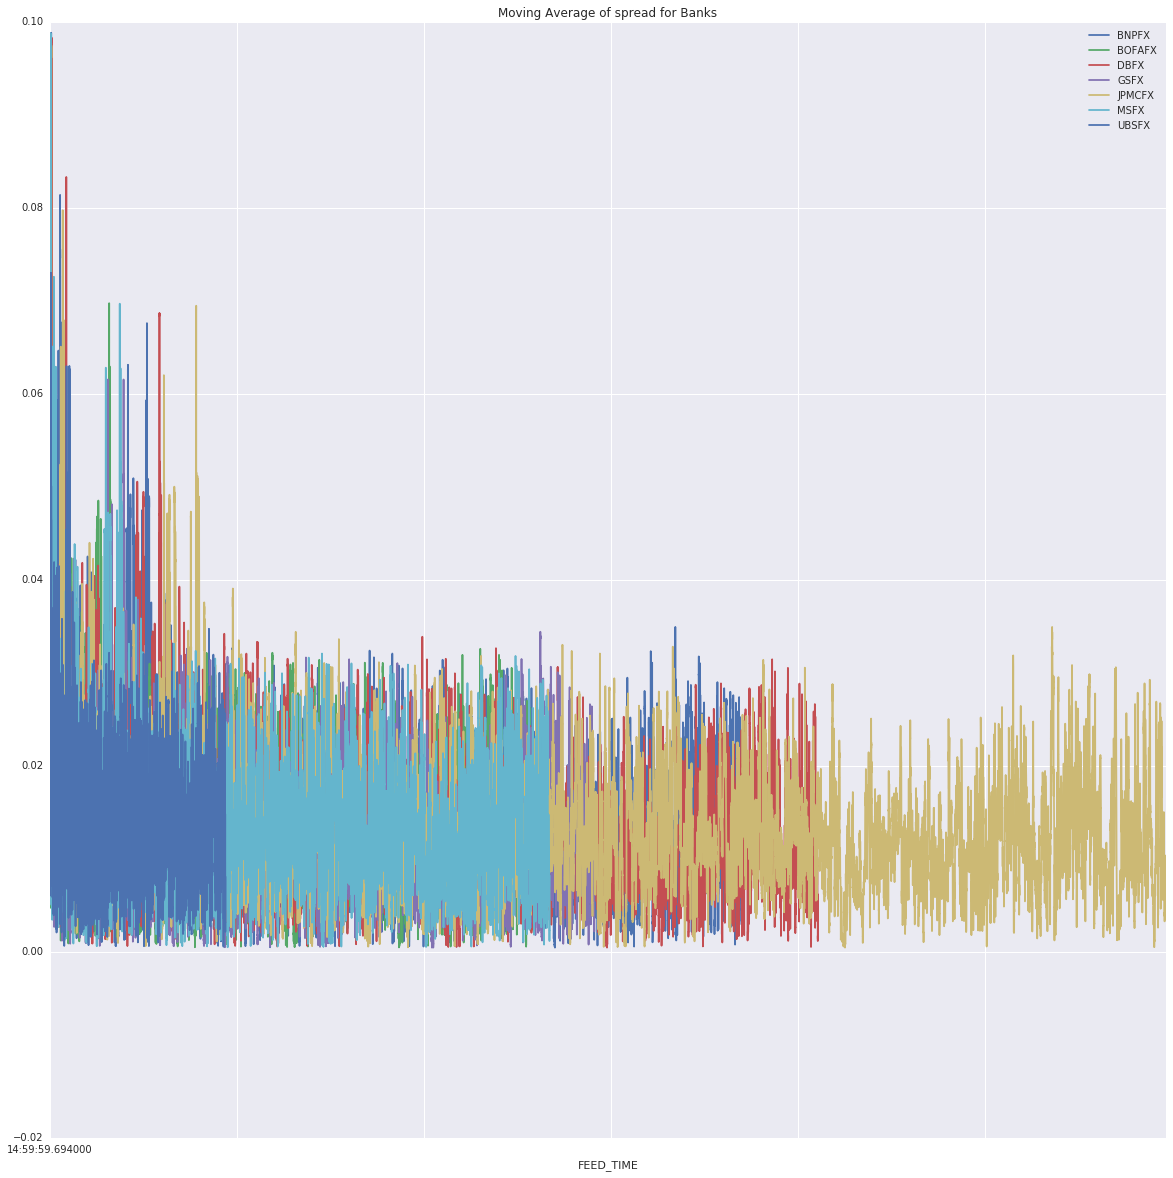

In [82]:
df.groupby('SOURCE')['100ma'].plot(legend=True,figsize=(20,20),kind='line',title='Moving Average of spread for Banks',ylim=(-0.02,0.1))

In [76]:
df_copy['Spread']=df_copy['ASK_PRICE']-df_copy['BID_PRICE']
df_copy.head()

,FEED_TIME,SOURCE,ASK_PRICE,BID_PRICE,Spread
0,2018-01-05 14:59:59.546,DBFX,18.8017,18.7742,0.0275
1,2018-01-05 14:59:59.546,DBFX,18.8017,18.7742,0.0275
2,2018-01-05 14:59:59.546,DBFX,18.7990,18.7769,0.0221
3,2018-01-05 14:59:59.547,DBFX,18.7924,18.7834,0.0090
4,2018-01-05 14:59:59.595,DBFX,111.8220,111.7870,0.0350


In [77]:
spread_list=[]
feed_time=[]
group_list=[]
df_copy['FEED_TIME']=pd.to_datetime(df_copy['FEED_TIME'],unit='ns')
for group,frame in df_copy.groupby('SOURCE'):
  spread_list.append(frame['Spread'])
  feed_time.append(frame['FEED_TIME'])
  group_list.append(group)

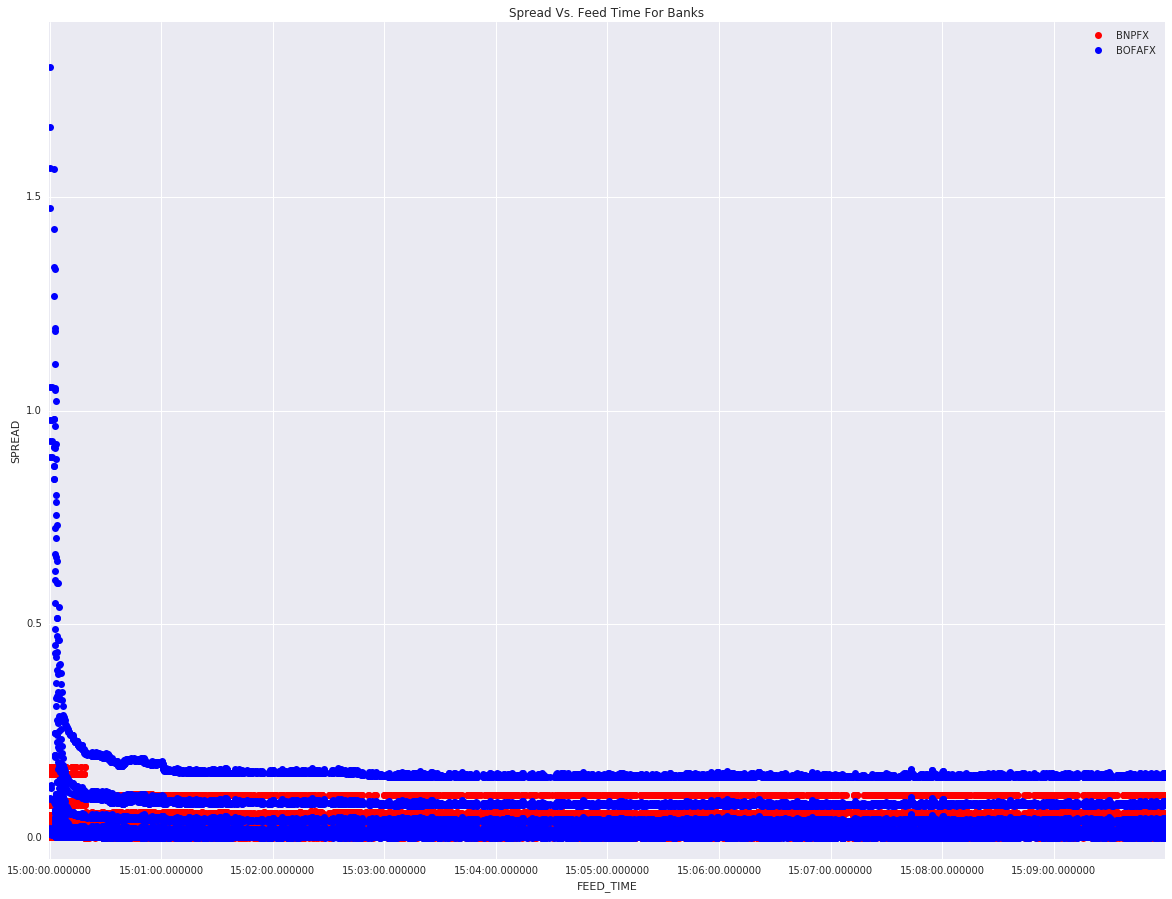

In [83]:
plt.figure(figsize=(20,15))
plt.plot(feed_time[0],spread_list[0],'ro',label=group_list[0])
plt.plot(feed_time[1],spread_list[1],'bo',label=group_list[1])
#plt.plot(feed_time[2],spread_list[2],'go',label=group_list[2])
#plt.plot(feed_time[3],spread_list[3],'co',label=group_list[3])
#plt.plot(feed_time[4],spread_list[4],'ko',label=group_list[4])
#plt.plot(feed_time[5],spread_list[5],'mo',label=group_list[5])
#plt.plot(feed_time[6],spread_list[6],'yo',label=group_list[6])
plt.xlabel('FEED_TIME')
plt.ylabel('SPREAD')
plt.title('Spread Vs. Feed Time For Banks')
plt.ylim(-0.05,max(df_copy['Spread'])+0.05)
plt.legend()
plt.show()

SOURCE
BNPFX     Axes(0.125,0.125;0.775x0.775)
BOFAFX    Axes(0.125,0.125;0.775x0.775)
DBFX      Axes(0.125,0.125;0.775x0.775)
GSFX      Axes(0.125,0.125;0.775x0.775)
JPMCFX    Axes(0.125,0.125;0.775x0.775)
MSFX      Axes(0.125,0.125;0.775x0.775)
UBSFX     Axes(0.125,0.125;0.775x0.775)
Name: Spread, dtype: object

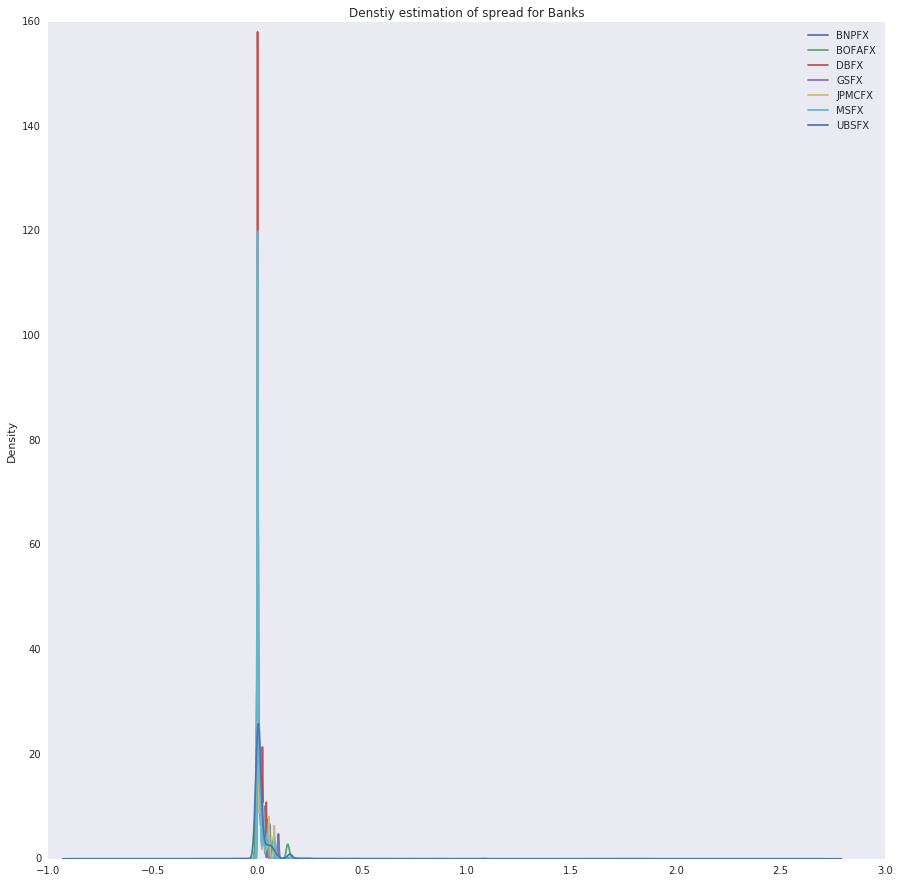

In [84]:
df.groupby('SOURCE')['Spread'].plot(kind='kde',legend=True,figsize=(15,15),grid=False,title='Denstiy estimation of spread for Banks')

SOURCE
BNPFX     Axes(0.125,0.125;0.775x0.775)
BOFAFX    Axes(0.125,0.125;0.775x0.775)
DBFX      Axes(0.125,0.125;0.775x0.775)
GSFX      Axes(0.125,0.125;0.775x0.775)
JPMCFX    Axes(0.125,0.125;0.775x0.775)
MSFX      Axes(0.125,0.125;0.775x0.775)
UBSFX     Axes(0.125,0.125;0.775x0.775)
Name: Spread, dtype: object

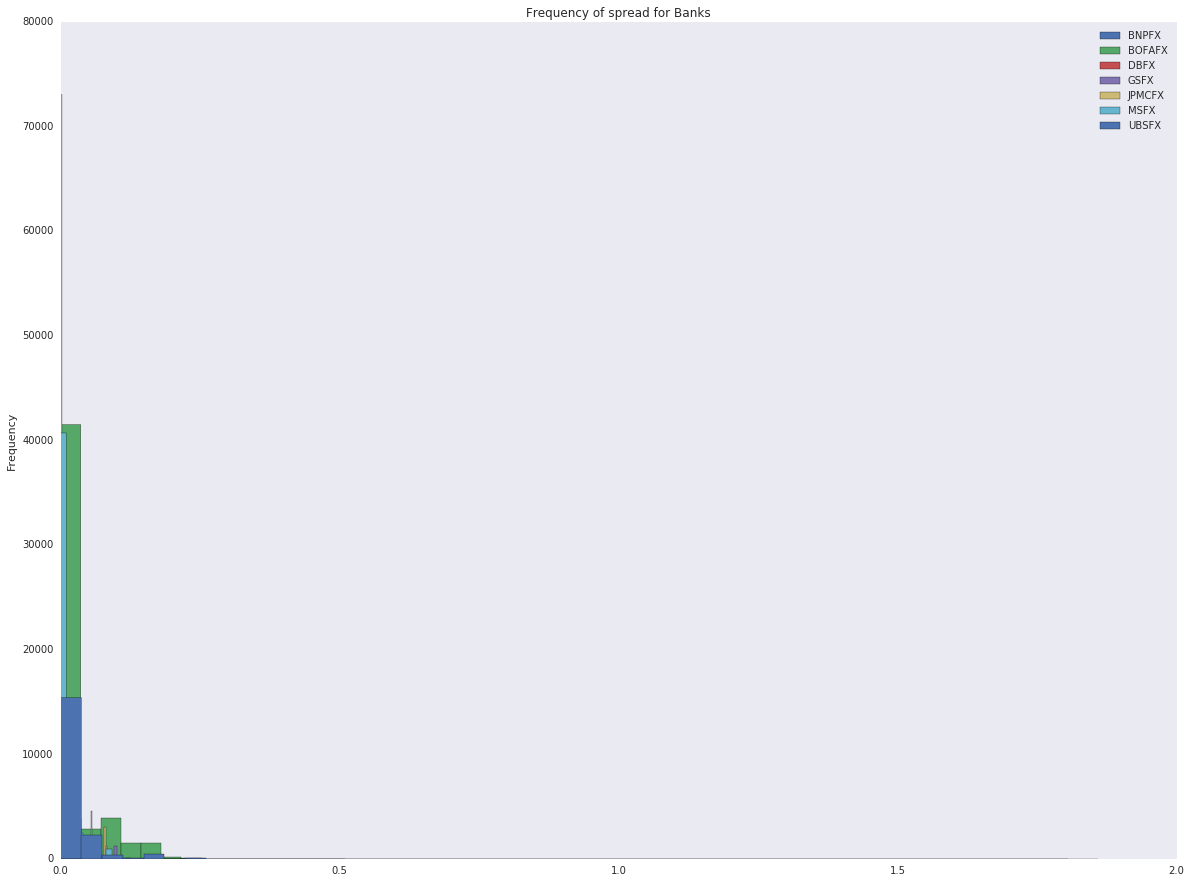

In [85]:
df.groupby('SOURCE')['Spread'].plot(kind='hist',legend=True,figsize=(20,15),bins=50,grid=False,title='Frequency of spread for Banks')